In [1]:
import pandas as pd
movies_path = r"C:\Users\mv.khamenok\Desktop\Документы\Netology\Py\10._Основы_pandas\Файлы к заданию №1\movies.csv"
ratings_path = r"C:\Users\mv.khamenok\Desktop\Документы\Netology\Py\10._Основы_pandas\Файлы к заданию №1\ratings.csv"
keywords_path = r"C:\Users\mv.khamenok\Desktop\Документы\Netology\Py\10._Основы_pandas\Файлы к заданию №1\keywords.csv"
keywords = pd.read_csv(keywords_path)
movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)

In [7]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [3]:
def rating_class(r):
    if r <= 2:
        return 'низкий рейтинг'
    elif r <= 4:
        return 'средний рейтинг'
    elif (r == 5  or r == 4.5):
        return 'высокий рейтинг'
    else:
        return 'не определен'  

ratings['class'] = ratings['rating'].apply(rating_class)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,средний рейтинг
1,1,3,4.0,964981247,средний рейтинг
2,1,6,4.0,964982224,средний рейтинг
3,1,47,5.0,964983815,высокий рейтинг
4,1,50,5.0,964982931,высокий рейтинг


In [ ]:
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

def geo_classifier(query):
    q = str(query).lower()
    for region, cities in geo_data.items():
        for city in cities:
            if city in q:
                return region
    return 'undefined'

keywords['region'] = keywords['keyword'].apply(geo_classifier)
keywords.head()

In [11]:
years = list(range(1950, 2011))

def production_year(title):
    t = str(title)
    for y in years:
        if str(y) in t:
            return y
    return 1900

movies['year'] = movies['title'].apply(production_year)
movies[['title', 'year']].head()

,title,year
0,Toy Story (1995),1995
1,Jumanji (1995),1995
2,Grumpier Old Men (1995),1995
3,Waiting to Exhale (1995),1995
4,Father of the Bride Part II (1995),1995


In [12]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1900
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1900
9739,193585,Flint (2017),Drama,1900
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1900


In [13]:
merged = ratings.merge(movies[['movieId', 'year']], on='movieId', how='left')
rating_by_year = merged.groupby('year')['rating'].mean().sort_values(ascending=False)
rating_by_year.head(20)

year
1957    4.039535
1954    4.009191
1962    3.969466
1952    3.953125
1972    3.944293
1964    3.940160
1974    3.935622
1967    3.922572
1975    3.879121
1958    3.842424
1971    3.841463
1966    3.823684
1950    3.813665
1968    3.812212
1977    3.810406
1951    3.804945
1959    3.794239
1981    3.760732
1976    3.760047
1973    3.757764
Name: rating, dtype: float64

In [14]:
rating_by_year_1950_2010 = rating_by_year.loc[1950:2010]

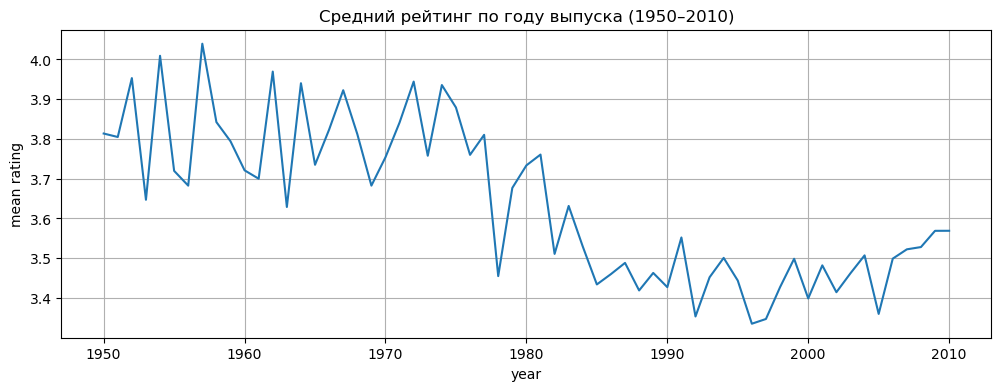

In [15]:
import matplotlib.pyplot as plt

merged_filtered = merged[merged['year'].between(1950, 2010)]
merged_filtered.groupby('year')['rating'].mean().plot(figsize=(12,4))
plt.title('Средний рейтинг по году выпуска (1950–2010)')
plt.ylabel('mean rating')
plt.xlabel('year')
plt.grid(True)
plt.show()

In [16]:
merged = ratings.merge(movies[['movieId', 'year']], on='movieId', how='left')
avg_rating_by_year = (
    merged.groupby('year', as_index=False)['rating']
          .mean()
          .sort_values('rating', ascending=False)
)
avg_rating_by_year

,year,rating
8,1957,4.039535
5,1954,4.009191
13,1962,3.969466
3,1952,3.953125
23,1972,3.944293
...,...,...
51,2000,3.398922
56,2005,3.359976
43,1992,3.353555
48,1997,3.347241
